In [4]:
# import functions
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

In [8]:
#constant
kb = 1.3806452e-23 #unit in J/k
Na = 6.02214e23 #unit in 1/mol
mass = (84 / 1000)/Na #unit in kg
T = 150 #unit in K
beta = 1/(kb*T)


In [9]:
#Calculate the Maxwell_Boltzmann velocity distribution for one particle

def MB_velocity(v):
    beta = 1/(kb*T)
    term_1 = mass * beta / (2*np.pi)
    term_2 = - beta * mass * (v**2)/ 2
    Pv = (term_1)**(1/2) * np.exp (term_2) 

    return Pv

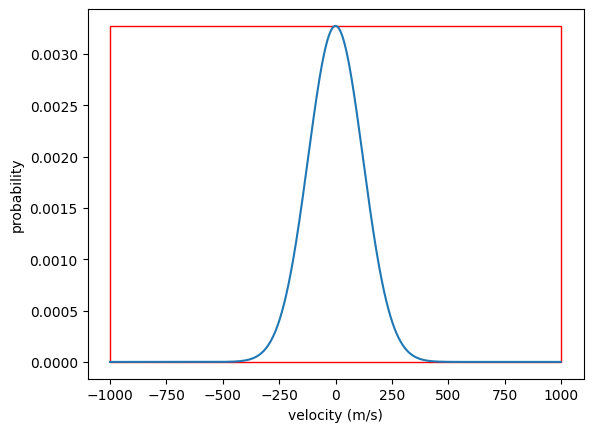

In [10]:
#plot for 3a 

velocity = np.arange (-1000,1000)
distVelocity = MB_velocity(velocity)
maxPoint = np.max(distVelocity)

fig, ax = plt.subplots()
ax.plot(velocity, distVelocity)
ax.set_xlabel ("velocity (m/s)")
ax.set_ylabel ("probability")
rect = patches.Rectangle((-1000, 0), 2000, maxPoint, edgecolor = "r",facecolor='none')
ax.add_patch(rect)
plt.show()


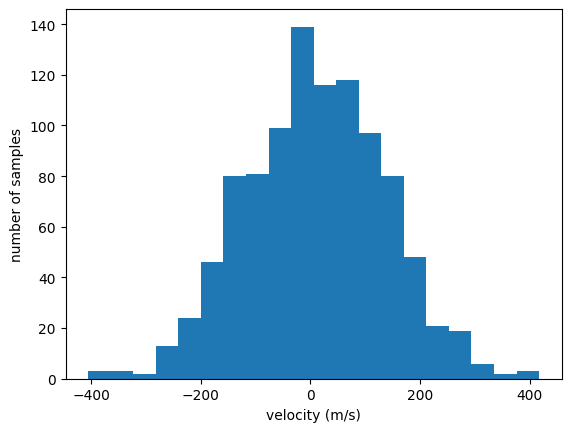

In [196]:
#3b
#Collecting 1000 points
def MB_sample():
    
    probability = []
    while True:
        xValue = random.uniform(-1000,1000)
        yValue = random.uniform(0,maxPoint)

        if yValue <= MB_velocity(xValue):
            probability = np.append(probability,xValue)
        if len(probability) >= 1000:
            break
    return probability

#Plot of 3b
plt.hist(MB_sample(), 20)
plt.xlabel ("velocity (m/s)")
plt.ylabel ("number of samples")
plt.show()

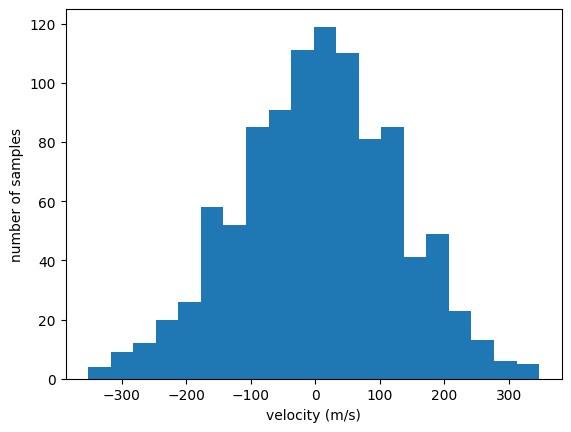

In [189]:
#3c
#simga * np.random.randn + mu
sigma = np.sqrt(1/(mass*beta))
xValue = sigma * np.random.randn(1000)
plt.hist(xValue, 20)
plt.xlabel ("velocity (m/s)")
plt.ylabel ("number of samples")
plt.show()

In [11]:
#3d

def sample_normal(mass, T):
    mass = (mass/1000)/Na
    beta = 1/(kb*T)
    sigma = np.sqrt(1/(mass*beta))
    velocity = sigma * np.random.randn() /1000
    return velocity 

def initVelocity(coord, mass, T):
    velocities = np.zeros_like(coord)

    for i in range (0,len(velocities)):
        for j in range (0, 3):
            velocities[i][j] = sample_normal(mass[i], T)

    return velocities